<a href="https://colab.research.google.com/github/krishnauttej/Digit-Recognisation/blob/master/Digit_Recognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools


from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from keras.optimizers import RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping


#sns.set(style='white', context='notebook', palette='deep')

In [0]:
# import warnings
# warnings.filterwarnings('ignore')

In [0]:

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



In [5]:
test.shape

(28000, 784)

In [6]:

Y_train = train["label"]
print(Y_train.shape)



X_train = train.drop(labels = ["label"],axis = 1) 
print(X_train.shape)









(42000,)
(42000, 784)


In [0]:

X_train = X_train / 255.0
test = test / 255.0

In [0]:

X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [9]:


Y_train = to_categorical(Y_train, num_classes = 10)

Y_train.shape

(42000, 10)

In [0]:

random_seed = 2


X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state=random_seed)

In [11]:
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation='relu'))

#Output Layer with softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)               

In [24]:
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(10, activation='softmax'))
	# compile model
 opt = SGD(lr=0.01, momentum=0.9)
 model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
 model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [0]:

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.1)

In [0]:

epochs = 30


batch_size = 86

In [0]:

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,    
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)

In [28]:

history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size,
                              callbacks=[learning_rate_reduction])

Epoch 1/30
 - 7s - loss: 0.4902 - accuracy: 0.8415 - val_loss: 0.1219 - val_accuracy: 0.9654
Epoch 2/30
 - 7s - loss: 0.1487 - accuracy: 0.9526 - val_loss: 0.0838 - val_accuracy: 0.9725
Epoch 3/30
 - 7s - loss: 0.1097 - accuracy: 0.9667 - val_loss: 0.0533 - val_accuracy: 0.9826
Epoch 4/30
 - 7s - loss: 0.0904 - accuracy: 0.9714 - val_loss: 0.0560 - val_accuracy: 0.9810
Epoch 5/30
 - 7s - loss: 0.0792 - accuracy: 0.9764 - val_loss: 0.0439 - val_accuracy: 0.9857
Epoch 6/30
 - 7s - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 7/30
 - 7s - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0334 - val_accuracy: 0.9889
Epoch 8/30
 - 7s - loss: 0.0599 - accuracy: 0.9816 - val_loss: 0.0352 - val_accuracy: 0.9894
Epoch 9/30
 - 7s - loss: 0.0562 - accuracy: 0.9821 - val_loss: 0.0389 - val_accuracy: 0.9881
Epoch 10/30
 - 7s - loss: 0.0532 - accuracy: 0.9838 - val_loss: 0.0368 - val_accuracy: 0.9880
Epoch 11/30
 - 7s - loss: 0.0507 - accuracy: 0.9842 - val_loss: 0.041

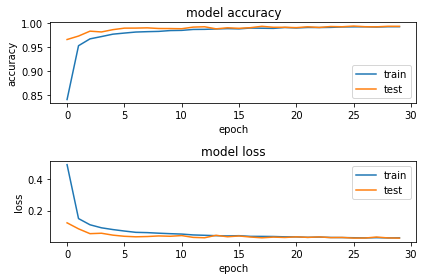

In [29]:

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()


In [0]:

results = model.predict(test)


results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)


submission.to_csv("krishna.csv",index=False)